# 고객 구매 여정 분석(Report)

## 문제 상황  

인터넷 쇼핑몰을 운영하고 있는 A사는 최근 고객의 페이지 클릭수, 이탈률, 종료율이 증가하고 있어 고민이다. 이를 해결하기 위해 고객이  
이탈하는 페이지를 찾고, UX/UI를 개선하려고 한다.

## 문제 해결 프로세스  

1. 문제정의

- MAU(Monthly Active User) 감소, 이탈 고객 증가

2. 기대효과

- MAU(Monthly Active User) 증가, 이탈 고객 감소 

3. 해결방안

- 이탈/종료 Page 탐색 및 UX/UI 개선

4. 성과측정

- UX/UI 개선 후 이탈률/종료율, 페이지클릭수 지표 모니터링

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ETC/고객 구매 여정 분석/고객 구매 여정 분석.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 모든 변수에 결측치가 존재하지 않는다.

- 만약, 결측치의 개수가 전체 5% 미만이면 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- object형태 2개, int64형태 7개, float64형태 7개, bool형태 2개로 구성되어 있다.

3. 컬럼 설명

- Administrative : 관리페이지 ID
- Administrative_Duration : 관리페이지 체류시간
- Informational : 정보페이지 ID
- Informational_Duration : 정보페이지 체류시간
- ProductRelated : 제품페이지 ID
- ProductRelated_Duration : 제품페이지 체류시간
- BounceRates : 이탈률
- ExitRates : 종료율
- PageValues : 페이지클릭수
- SpecialDay : 기념일여부
- Month : 월
- OperatingSystems : 운영시스템
- Browser : 브라우저
- Region : 지역
- TrafficType : 트래픽 타입
- VisitorType : 방문타입
- Weekend : 주말
- Revenue : 손익

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다

이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다

In [5]:
df_n = df.select_dtypes(exclude = ['object', 'bool'])

In [6]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,Administrative,0.0
1,Administrative,0.0
2,Administrative,0.0
3,Administrative,0.0
4,Administrative,0.0
...,...,...
172615,TrafficType,1.0
172616,TrafficType,8.0
172617,TrafficType,13.0
172618,TrafficType,11.0


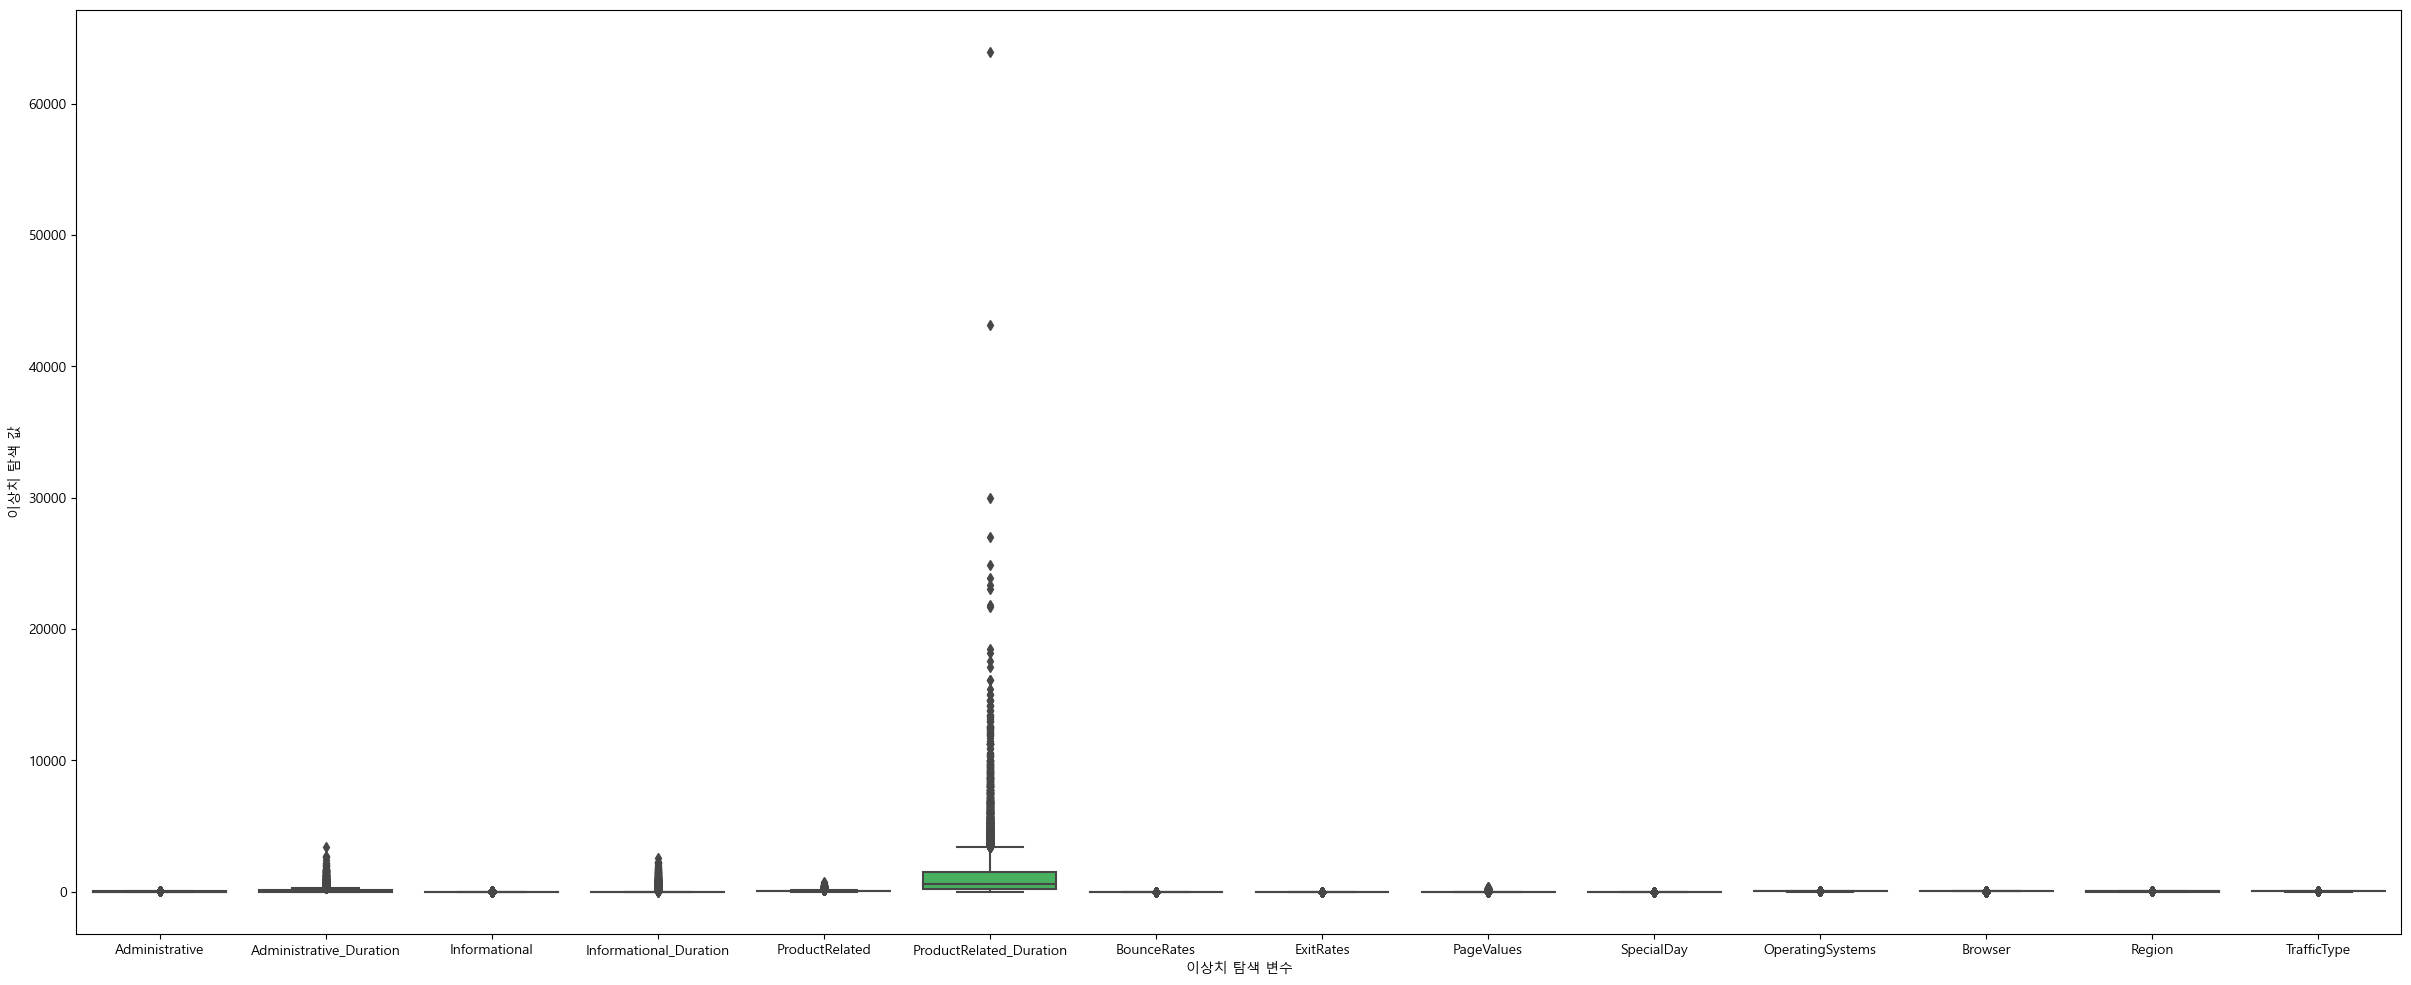

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (30,12))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(14), df_n.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다. 위의 ProductRelated_Duration 변수는 제품페이지 체류시간이기 때문에 그대로 둔다. 해당 페이지를 머무른 상태에서 다른 작업을 진행했을 가능성도 존재한다고 판단한다

In [8]:
pd.DataFrame(df['Month'].value_counts())

,Month
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288
Feb,184


월별 사용자 이용 수를 확인한 결과, 5월이 가장 많은 것을 알 수 있다

In [9]:
pd.DataFrame(df['Month'].value_counts(), index=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

,Month
Feb,184
Mar,1907
May,3364
June,288
Jul,432
Aug,433
Sep,448
Oct,549
Nov,2998
Dec,1727


월별 사용자 이용 수를 가독성이 높게 월별로 정렬한다

In [10]:
df_cus = df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']]
df_cus.head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,1,0.20,0.20,0.0
1,0,0,2,0.00,0.10,0.0
2,0,0,1,0.20,0.20,0.0
3,0,0,2,0.05,0.14,0.0
4,0,0,10,0.02,0.05,0.0


페이지 관점으로 데이터를 필터링한다. 각 페이지별 ID, 이탈률, 종료율, 페이지클릭수 순서로 정리한다  

- BounceRates(이탈률) : 해당 페이지에서 아무런 행동도 하지않고 이탈한 비율
- ExitRates(종료율) : 해당 페이지가 탐색에 마지막 페이지가 된 비율

In [11]:
df_cus = df_cus.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False).mean()
df_cus

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517
...,...,...,...,...,...,...
3126,24,5,34,0.000000,0.013801,0.000000
3127,24,6,178,0.003939,0.015263,6.149344
3128,24,6,189,0.018642,0.043831,0.870148
3129,26,9,183,0.011055,0.014200,19.567464


사용자 여정은 총 3,131개이다  

- 사용자 여정 : 관리페이지 - 정보페이지 - 제품페이지까지 도달한 unique한 경로

In [12]:
df_cus.sort_values(by=['PageValues'], ascending = False).head(10)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
463,1,0,114,0.000000,0.000590,255.569158
1306,4,0,62,0.000000,0.001042,246.758590
2384,8,3,52,0.000000,0.005172,214.306663
3121,22,3,205,0.001747,0.008801,177.528825
2943,13,1,59,0.000000,0.004545,167.230834
263,0,2,66,0.000000,0.006154,143.211538
546,1,1,104,0.003883,0.010097,141.459054
1677,5,1,184,0.000000,0.003819,138.320834
2418,8,6,99,0.001869,0.006805,129.101374
1511,4,6,111,0.005420,0.006678,119.641474


페이지 클릭수로 정렬한 결과, 관리1/정보0/제품114 여정이 가장 클릭수가 높은 것을 확인할 수 있다

## 구매 여정 분석(페이지클릭수가 가장 낮은 사용자 여정)

In [13]:
df_cus.sort_values(by=['PageValues'], ascending=True)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1200,3,4,1,0.000000,0.025000,0.000000
1199,3,3,290,0.012383,0.024238,0.000000
2443,9,0,20,0.019024,0.032204,0.000000
2444,9,0,21,0.026923,0.051538,0.000000
...,...,...,...,...,...,...
2943,13,1,59,0.000000,0.004545,167.230834
3121,22,3,205,0.001747,0.008801,177.528825
2384,8,3,52,0.000000,0.005172,214.306663
1306,4,0,62,0.000000,0.001042,246.758590


페이지 클릭이 가장 낮았던 사용자 여정을 확인한 결과, 관리0/정보0/제품0 여정이 가장 클릭수가 낮은 것을 확인할 수 있다

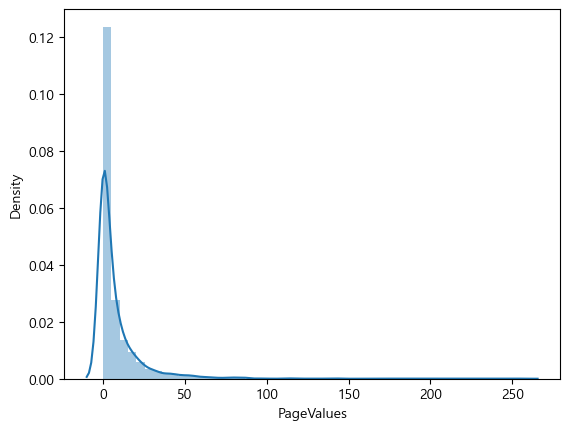

In [14]:
sns.distplot(df_cus['PageValues']);

PageValues(페이지클릭수)변수의 분포를 확인한 결과, 20이하인 사용자들이 대부분인 것을 알 수 있다

## 구매 여정 분석(이탈률이 가장 높은 사용자 여정)

In [15]:
df_cus.sort_values(by=['BounceRates'], ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
133,0,1,0,0.200000,0.200000,0.000000
479,1,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
2537,9,2,9,0.000000,0.017647,0.000000
335,0,4,38,0.000000,0.026190,0.000000
2541,9,2,18,0.000000,0.007667,37.699200
2544,9,2,23,0.000000,0.022917,6.064426


이탈률이 가장 높은 사용자 여정을 확인한 결과, 관리0/정보1/제품0 여정이 가장 이탈률이 높은 것을 확인할 수 있다 

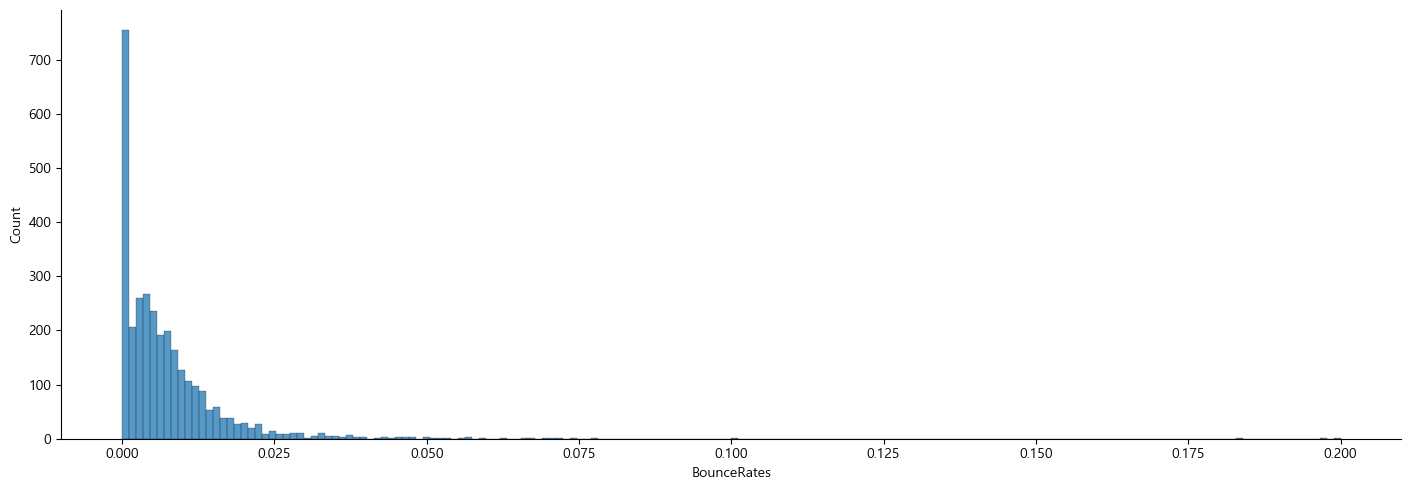

In [16]:
sns.displot(df_cus, x="BounceRates");
plt.gcf().set_size_inches(16, 5)

BounceRates(이탈률)변수의 분포를 확인한 결과, 2%이하인 사용자들이 대부분인 것을 알 수 있다

In [17]:
print("평균 이탈률 : ", (df_cus['BounceRates'].mean())*100)

평균 이탈률 :  0.746099327081189


In [18]:
df_cus['BounceRates'].describe()

count    3131.000000
mean        0.007461
std         0.011096
min         0.000000
25%         0.001362
50%         0.005000
75%         0.009804
max         0.200000
Name: BounceRates, dtype: float64

In [19]:
df_cus[df_cus['BounceRates']>0.009804].head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517


In [20]:
len(df_cus[df_cus['BounceRates']>0.009804])

781

3사분위수(75%) 기준으로 이탈률이 높은 사용자 여정 탐색을 실시해본다

In [21]:
df_admin = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('Administrative')['Administrative'].count().sort_values(ascending=False))
df_admin.head(10)

,Administrative
Administrative,
0,140
1,86
2,81
3,68
5,63
4,54
6,52
9,45
8,42


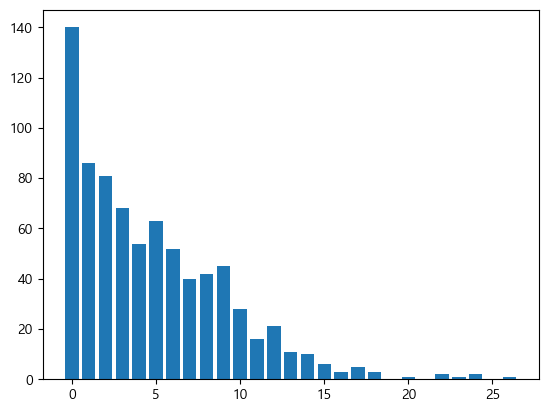

In [22]:
plt.bar(df_admin.index, df_admin['Administrative']);

Administrative(관리페이지)가 0이 가장 이탈률이 높은 것을 확인할 수 있다

In [23]:
df_info = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('Informational')['Informational'].count().sort_values(ascending=False))
df_info.head(10)

,Informational
Informational,
0,248
1,173
2,138
3,92
4,63
5,28
6,21
7,12
9,4


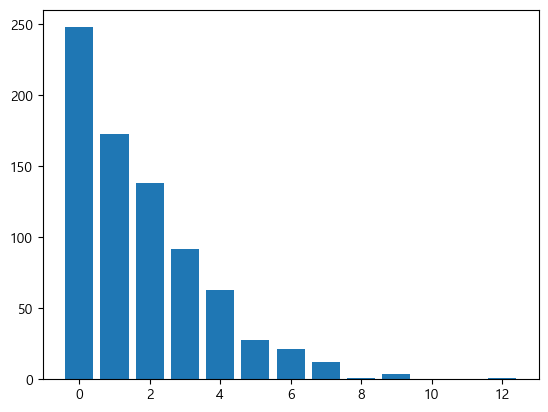

In [24]:
plt.bar(df_info.index, df_info['Informational']);

Informational(정보페이지)가 0이 가장 이탈률이 높은 것을 확인할 수 있다

In [25]:
df_prod = pd.DataFrame(df_cus[df_cus['BounceRates']>0.009804].groupby('ProductRelated')['ProductRelated'].count().sort_values(ascending=False))
df_prod.head(10)

,ProductRelated
ProductRelated,
36,18
23,15
8,15
27,15
11,14
17,14
24,13
45,13
26,13


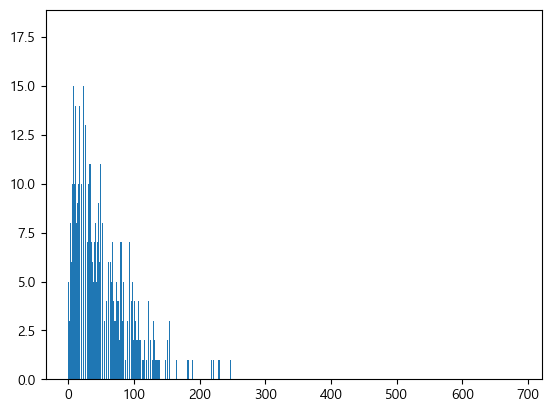

In [26]:
plt.bar(df_prod.index, df_prod['ProductRelated']);

ProductRelated(제품페이지)가 36이 가장 이탈률이 높은 것을 확인할 수 있다

## 구매 여정 분석(종료율 가장 높은 사용자 여정)

In [27]:
df_cus.sort_values(by=['ExitRates'], ascending=False)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
479,1,1,0,0.200000,0.200000,0.000000
133,0,1,0,0.200000,0.200000,0.000000
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
135,0,1,2,0.100000,0.133333,0.000000
...,...,...,...,...,...,...
1166,3,2,58,0.000000,0.000410,0.000000
772,2,0,109,0.000000,0.000262,0.000000
1241,3,6,17,0.000000,0.000000,27.695008
497,1,1,21,0.000000,0.000000,86.123515


종료율이 가장 높은 사용자 여정을 확인한 결과, 관리1/정보1/제품0 여정이 가장 종료율이 높은 것을 확인할 수 있다

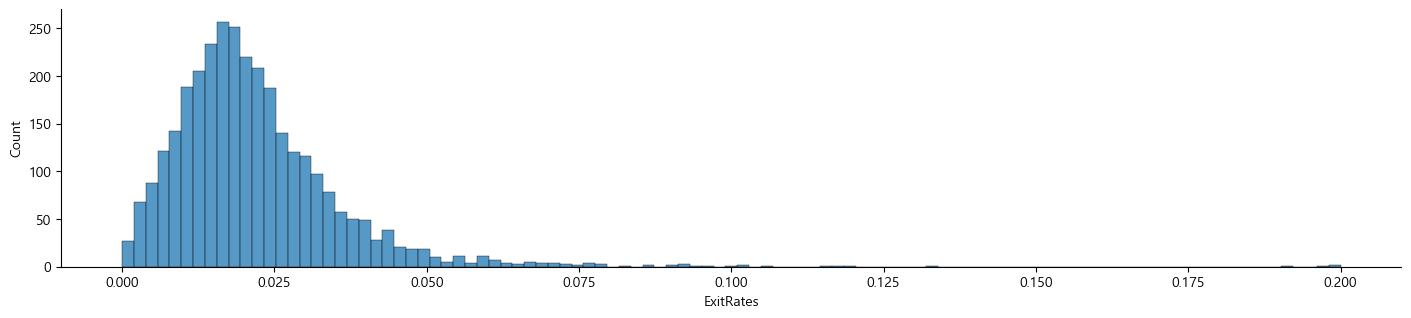

In [28]:
sns.displot(df_cus, x="ExitRates");
plt.gcf().set_size_inches(16, 3)

ExitRates(종료율)변수의 분포를 확인한 결과, 3%이하인 사용자들이 대부분인 것을 알 수 있다

In [29]:
print("평균 종료율 : ", (df_cus['ExitRates'].mean())*100)

평균 종료율 :  2.191452121274483


In [30]:
df_cus['ExitRates'].describe()

count    3131.000000
mean        0.021915
std         0.014863
min         0.000000
25%         0.013098
50%         0.019235
75%         0.027327
max         0.200000
Name: ExitRates, dtype: float64

In [31]:
df_cus[df_cus['ExitRates']>0.027327].head(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues
0,0,0,0,0.196667,0.196970,0.000000
1,0,0,1,0.183362,0.191400,0.183993
2,0,0,2,0.059117,0.119900,0.219656
3,0,0,3,0.043066,0.092056,0.843937
4,0,0,4,0.035120,0.076977,0.747517


In [32]:
len(df_cus[df_cus['ExitRates']>0.027327])

783

3사분위수(75%) 기준으로 종료율이 높은 사용자 여정 탐색을 실시해본다

In [33]:
df_admin = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('Administrative')['Administrative'].count().sort_values(ascending=False))
df_admin.head(10)

,Administrative
Administrative,
0,165
1,92
2,88
3,80
5,58
4,56
6,47
8,38
7,37


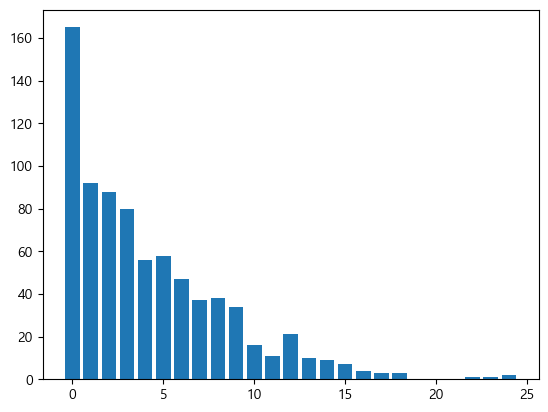

In [34]:
plt.bar(df_admin.index, df_admin['Administrative']);

Administrative(관리페이지)가 0이 가장 종료율이 높은 것을 확인할 수 있다

In [35]:
df_info = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('Informational')['Informational'].count().sort_values(ascending=False))
df_info.head(10)

,Informational
Informational,
0,243
1,181
2,150
3,89
4,52
5,28
6,18
7,11
9,3


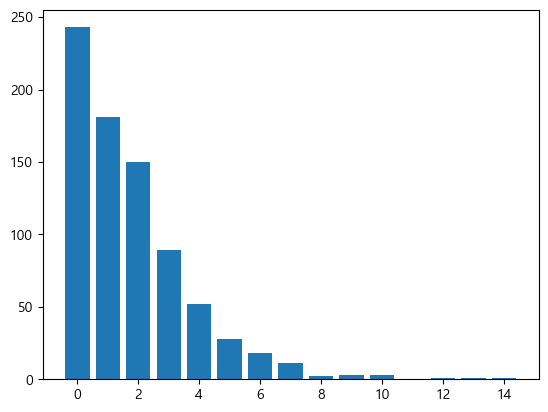

In [36]:
plt.bar(df_info.index, df_info['Informational']);

Informational(정보페이지)가 0이 가장 종료율이 높은 것을 확인할 수 있다

In [37]:
df_prod = pd.DataFrame(df_cus[df_cus['ExitRates']>0.027327].groupby('ProductRelated')['ProductRelated'].count().sort_values(ascending=False))
df_prod.head(10)

,ProductRelated
ProductRelated,
8,18
11,16
27,16
17,16
2,15
15,14
14,14
25,14
22,13


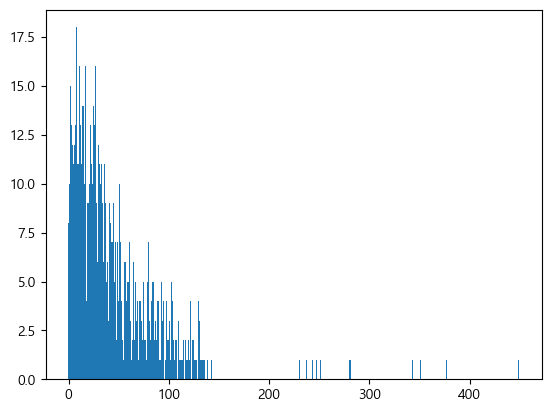

In [38]:
plt.bar(df_prod.index, df_prod['ProductRelated']);

ProductRelated(제품페이지)가 8이 가장 종료율이 높은 것을 확인할 수 있다

## 인사이트 도출

### 개선이 필요한 단일 페이지(관리)

In [39]:
df_admin_B = df_cus[df_cus['BounceRates']>0.009804].groupby('Administrative', as_index=False)['Administrative'].count()
df_admin_B = df_admin_B.reset_index()
df_admin_B.columns = ['ID', 'BounceRates_cnt']
df_admin_B.head(5)

,ID,BounceRates_cnt
0,0,140
1,1,86
2,2,81
3,3,68
4,4,54


Top5(이탈률 75% 분위수 이상 count)

In [40]:
df_admin_E = df_cus[df_cus['ExitRates']>0.027327].groupby('Administrative', as_index=False)['Administrative'].count()
df_admin_E = df_admin_E.reset_index()
df_admin_E.columns = ['ID', 'ExitRates_cnt']
df_admin_E.head(5)

,ID,ExitRates_cnt
0,0,165
1,1,92
2,2,88
3,3,80
4,4,56


Top5(종료율 75% 분위수 이상 count)

In [41]:
df_admin_merge = pd.merge(df_admin_B, df_admin_E, how='left', on='ID')
df_admin_merge['total'] = df_admin_merge['BounceRates_cnt'] +  df_admin_merge['ExitRates_cnt']
df_admin_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
0,0,140,165.0,305.0
1,1,86,92.0,178.0
2,2,81,88.0,169.0
3,3,68,80.0,148.0
5,5,63,58.0,121.0


이탈률과 종료율이 75% 분위수를 넘어가는 count가 가장 많은 페이지를 우선순위로 개선한다(관리페이지)

### 개선이 필요한 단일 페이지(정보)

In [45]:
df_info_B = df_cus[df_cus['BounceRates']>0.009804].groupby('Informational', as_index=False)['Informational'].count()
df_info_B = df_info_B.reset_index()
df_info_B.columns = ['ID', 'BounceRates_cnt']
df_info_B.head(5)

,ID,BounceRates_cnt
0,0,248
1,1,173
2,2,138
3,3,92
4,4,63


Top5(이탈률 75% 분위수 이상 count)

In [46]:
df_info_E = df_cus[df_cus['ExitRates']>0.027327].groupby('Informational', as_index=False)['Informational'].count()
df_info_E = df_info_E.reset_index()
df_info_E.columns = ['ID', 'ExitRates_cnt']
df_info_E.head(5)

,ID,ExitRates_cnt
0,0,243
1,1,181
2,2,150
3,3,89
4,4,52


Top5(종료율 75% 분위수 이상 count)

In [47]:
df_info_merge = pd.merge(df_info_B, df_info_E, how='left', on='ID')
df_info_merge['total'] = df_info_merge['BounceRates_cnt'] +  df_info_merge['ExitRates_cnt']
df_info_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
0,0,248,243,491
1,1,173,181,354
2,2,138,150,288
3,3,92,89,181
4,4,63,52,115


이탈률과 종료율이 75% 분위수를 넘어가는 count가 가장 많은 페이지를 우선순위로 개선한다(정보페이지)

### 개선이 필요한 단일 페이지(제품)

In [48]:
df_prod_B = df_cus[df_cus['BounceRates']>0.009804].groupby('ProductRelated', as_index=False)['ProductRelated'].count()
df_prod_B = df_prod_B.reset_index()
df_prod_B.columns = ['ID', 'BounceRates_cnt']
df_prod_B.head(5)

,ID,BounceRates_cnt
0,0,5
1,1,4
2,2,3
3,3,8
4,4,8


Top5(이탈률 75% 분위수 이상 count)

In [49]:
df_prod_E = df_cus[df_cus['ExitRates']>0.027327].groupby('ProductRelated', as_index=False)['ProductRelated'].count()
df_prod_E = df_prod_E.reset_index()
df_prod_E.columns = ['ID', 'ExitRates_cnt']
df_prod_E.head(5)

,ID,ExitRates_cnt
0,0,8
1,1,10
2,2,15
3,3,13
4,4,12


Top5(종료율 75% 분위수 이상 count)

In [50]:
df_prod_merge = pd.merge(df_prod_B, df_prod_E, how='left', on='ID')
df_prod_merge['total'] = df_prod_merge['BounceRates_cnt'] +  df_prod_merge['ExitRates_cnt']
df_prod_merge.sort_values(by=['total'], ascending=False).head(5)

,ID,BounceRates_cnt,ExitRates_cnt,total
8,8,15,18.0,33.0
27,27,15,16.0,31.0
17,17,14,16.0,30.0
11,11,14,16.0,30.0
36,36,18,11.0,29.0


이탈률과 종료율이 75% 분위수를 넘어가는 count가 가장 많은 페이지를 우선순위로 개선한다(제품페이지)

### 개선이 필요한 사용자 여정 조합

In [51]:
df_jny = df.groupby(['Administrative', 'Informational', 'ProductRelated'], as_index=False)[['BounceRates', 'ExitRates']].agg(['count', 'mean']).reset_index()
df_jny

Administrative Informational ProductRelated BounceRates            \
                                                       count      mean   
0                 0             0              0           6  0.196667   
1                 0             0              1         577  0.183362   
2                 0             0              2         375  0.059117   
3                 0             0              3         332  0.043066   
4                 0             0              4         285  0.035120   
...             ...           ...            ...         ...       ...   
3126             24             5             34           1  0.000000   
3127             24             6            178           1  0.003939   
3128             24             6            189           1  0.018642   
3129             26             9            183           1  0.011055   
3130             27             2            584           1  0.002099   

     ExitRates            
         count      mean  
0            6  0.196970  
1          577  0.191400  
2          375  0.119900  
3          332  0.092056  
4          285  0.076977  
...        ...       ...  
3126         1  0.013801  
3127         1  0.015263  
3128         1  0.043831  
3129         1  0.014200  
3130         1  0.009347  

[3131 rows x 7 columns]

각 사용자 여정별 정보 

- count(고객이 얼마나 해당 경로를 이용했는지)

- mean(해당 경로에 이탈률과 종료율의 평균)

In [52]:
df_jny.columns

MultiIndex([('Administrative',      ''),
            ( 'Informational',      ''),
            ('ProductRelated',      ''),
            (   'BounceRates', 'count'),
            (   'BounceRates',  'mean'),
            (     'ExitRates', 'count'),
            (     'ExitRates',  'mean')],
           )

위의 컬럼은 이중컬럼으로 구성되어 있다(예를 들어, 'BounceRates', 'count'가 하나의 컬럼이다)

In [53]:
df_jny.sort_values(by=[('BounceRates', 'count'), ('BounceRates', 'mean')], ascending=False).head(5)

Administrative Informational ProductRelated BounceRates           ExitRates  \
                                                    count      mean     count   
1              0             0              1         577  0.183362       577   
2              0             0              2         375  0.059117       375   
3              0             0              3         332  0.043066       332   
4              0             0              4         285  0.035120       285   
5              0             0              5         263  0.034415       263   

             
       mean  
1  0.191400  
2  0.119900  
3  0.092056  
4  0.076977  
5  0.070242

각 사용자 여정별 정보를 확인한 결과, 관리0/정보0/제품1의 경로가 사용자가 가장 많이 클릭하는 경로이며, 이탈률과 종료율도 높은 것을 알 수 있다. 이에 대한 개선이 필요한 부분이다

In [54]:
df_jny.sort_values(by=[('ExitRates', 'count'), ('ExitRates', 'mean')], ascending=False).head(5)

Administrative Informational ProductRelated BounceRates           ExitRates  \
                                                    count      mean     count   
1              0             0              1         577  0.183362       577   
2              0             0              2         375  0.059117       375   
3              0             0              3         332  0.043066       332   
4              0             0              4         285  0.035120       285   
5              0             0              5         263  0.034415       263   

             
       mean  
1  0.191400  
2  0.119900  
3  0.092056  
4  0.076977  
5  0.070242

각 사용자 여정별 정보를 확인한 결과, 관리0/정보0/제품1의 경로가 사용자가 가장 많이 클릭하는 경로이며, 이탈률과 종료율도 높은 것을 알 수 있다. 이에 대한 개선이 필요한 부분이다

1. 개선이 필요한 단일 페이지

- 관리 : ID (0, 1, 2, 3, 5)
- 정보 : ID (0, 1, 2, 3, 4)
- 제품 : ID (8, 27, 17, 11, 36)

2. 개선이 필요한 사용자 여정 조합

- (0,0,1)
- (0,0,2)
- (0,0,3)
- (0,0,4)
- (0,0,5)

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 지표를 기반으로 UX/UI 개선 후 이탈률/종료율/페이지클릭수 지표 모니터링을 통해 비교하는것이다